In [151]:
library(tidyverse)
library(zeallot)
library(magrittr)
source("../../R/exp-utils.R")
source("../../R/plot-utils.R")
source("../../R/alg/cma-es-csa.R")
source("../../R/alg/cma-es-classic.R")
source("../../R/alg/cma-es-ppmf.R")
source("../../R/alg/cma-es-ppmf-classic.R")
options(repr.plot.width=15, repr.plot.height=6)

#### Funkcje testowe

In [114]:
# F-cja sferyczna
sphere_func = . %>% crossprod(.)
attributes(sphere_func) = c(attributes(sphere_func), name = "sphere")
# Elispoida
ellips_func = function(x, a = 10) {
  N = length(x)
  sum(x^2 * a^((1:N - 1) / (N - 1)))
}
attributes(ellips_func) = c(attributes(ellips_func), name = "ellips")

# F-cja liniowa
linear_func = function(x) {
  x[1]
}
attributes(linear_func) = c(attributes(linear_func), name = "linear")

# F-cja Rastrigina
rastrigin_func = function(x) {
  A_factor = 10
  cos_term = 
    purrr::map_dbl(x, function(x) {
      base::cos(2*pi*x)
    })
  A_factor*length(x) + sum(x*x - A_factor*cos_term)
}
attributes(rastrigin_func) = c(attributes(rastrigin_func), name = "rastrigin")

# F-cja Sum Diff
sum_diff_func = function(x) { 
  N = length(x)
  sum(abs(x)^(1:N + 1))
}
attributes(sum_diff_func) = c(attributes(sum_diff_func), name = "sum_diff")

# F-cja Rosenbrocka
rosenbrock_func = function(x) {
  N <- length(x)
  xi <- x[1:(N-1)]
  xnext <- x[2:N]
  sum(100*(xnext-xi^2)^2 + (xi-1)^2)
}
attributes(rosenbrock_func) = c(attributes(rosenbrock_func), name = "rosenbrock")




#### Parametry

In [115]:
dims = c(2, 3, 5, 10)
func_list = list(sphere = sphere_func, ellips = ellips_func, linear_func, rastrigin_func, sum_diff_func, rosenbrock_func)
x0 = 100
control = list(
    stopfitness = 10^(-20)
)

In [116]:
csa_data = 
    run_massive_experiments(cma_es_csa, func_list, dims, x0, control)

In [117]:
csa_classic_data = 
    run_massive_experiments(cma_es_classic, func_list, dims, x0, control)

In [118]:
ppmf_data = 
    run_massive_experiments(cma_es_ppmf, func_list, dims, x0, control)

In [119]:
ppmf_classic_data = 
    run_massive_experiments(cma_es_ppmf_classic, func_list, dims, x0, control)

In [122]:
all_data = 
    merge_results(list(csa_data, csa_classic_data, ppmf_data, ppmf_classic_data))

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 59 row(s) containing missing values (geom_path).”


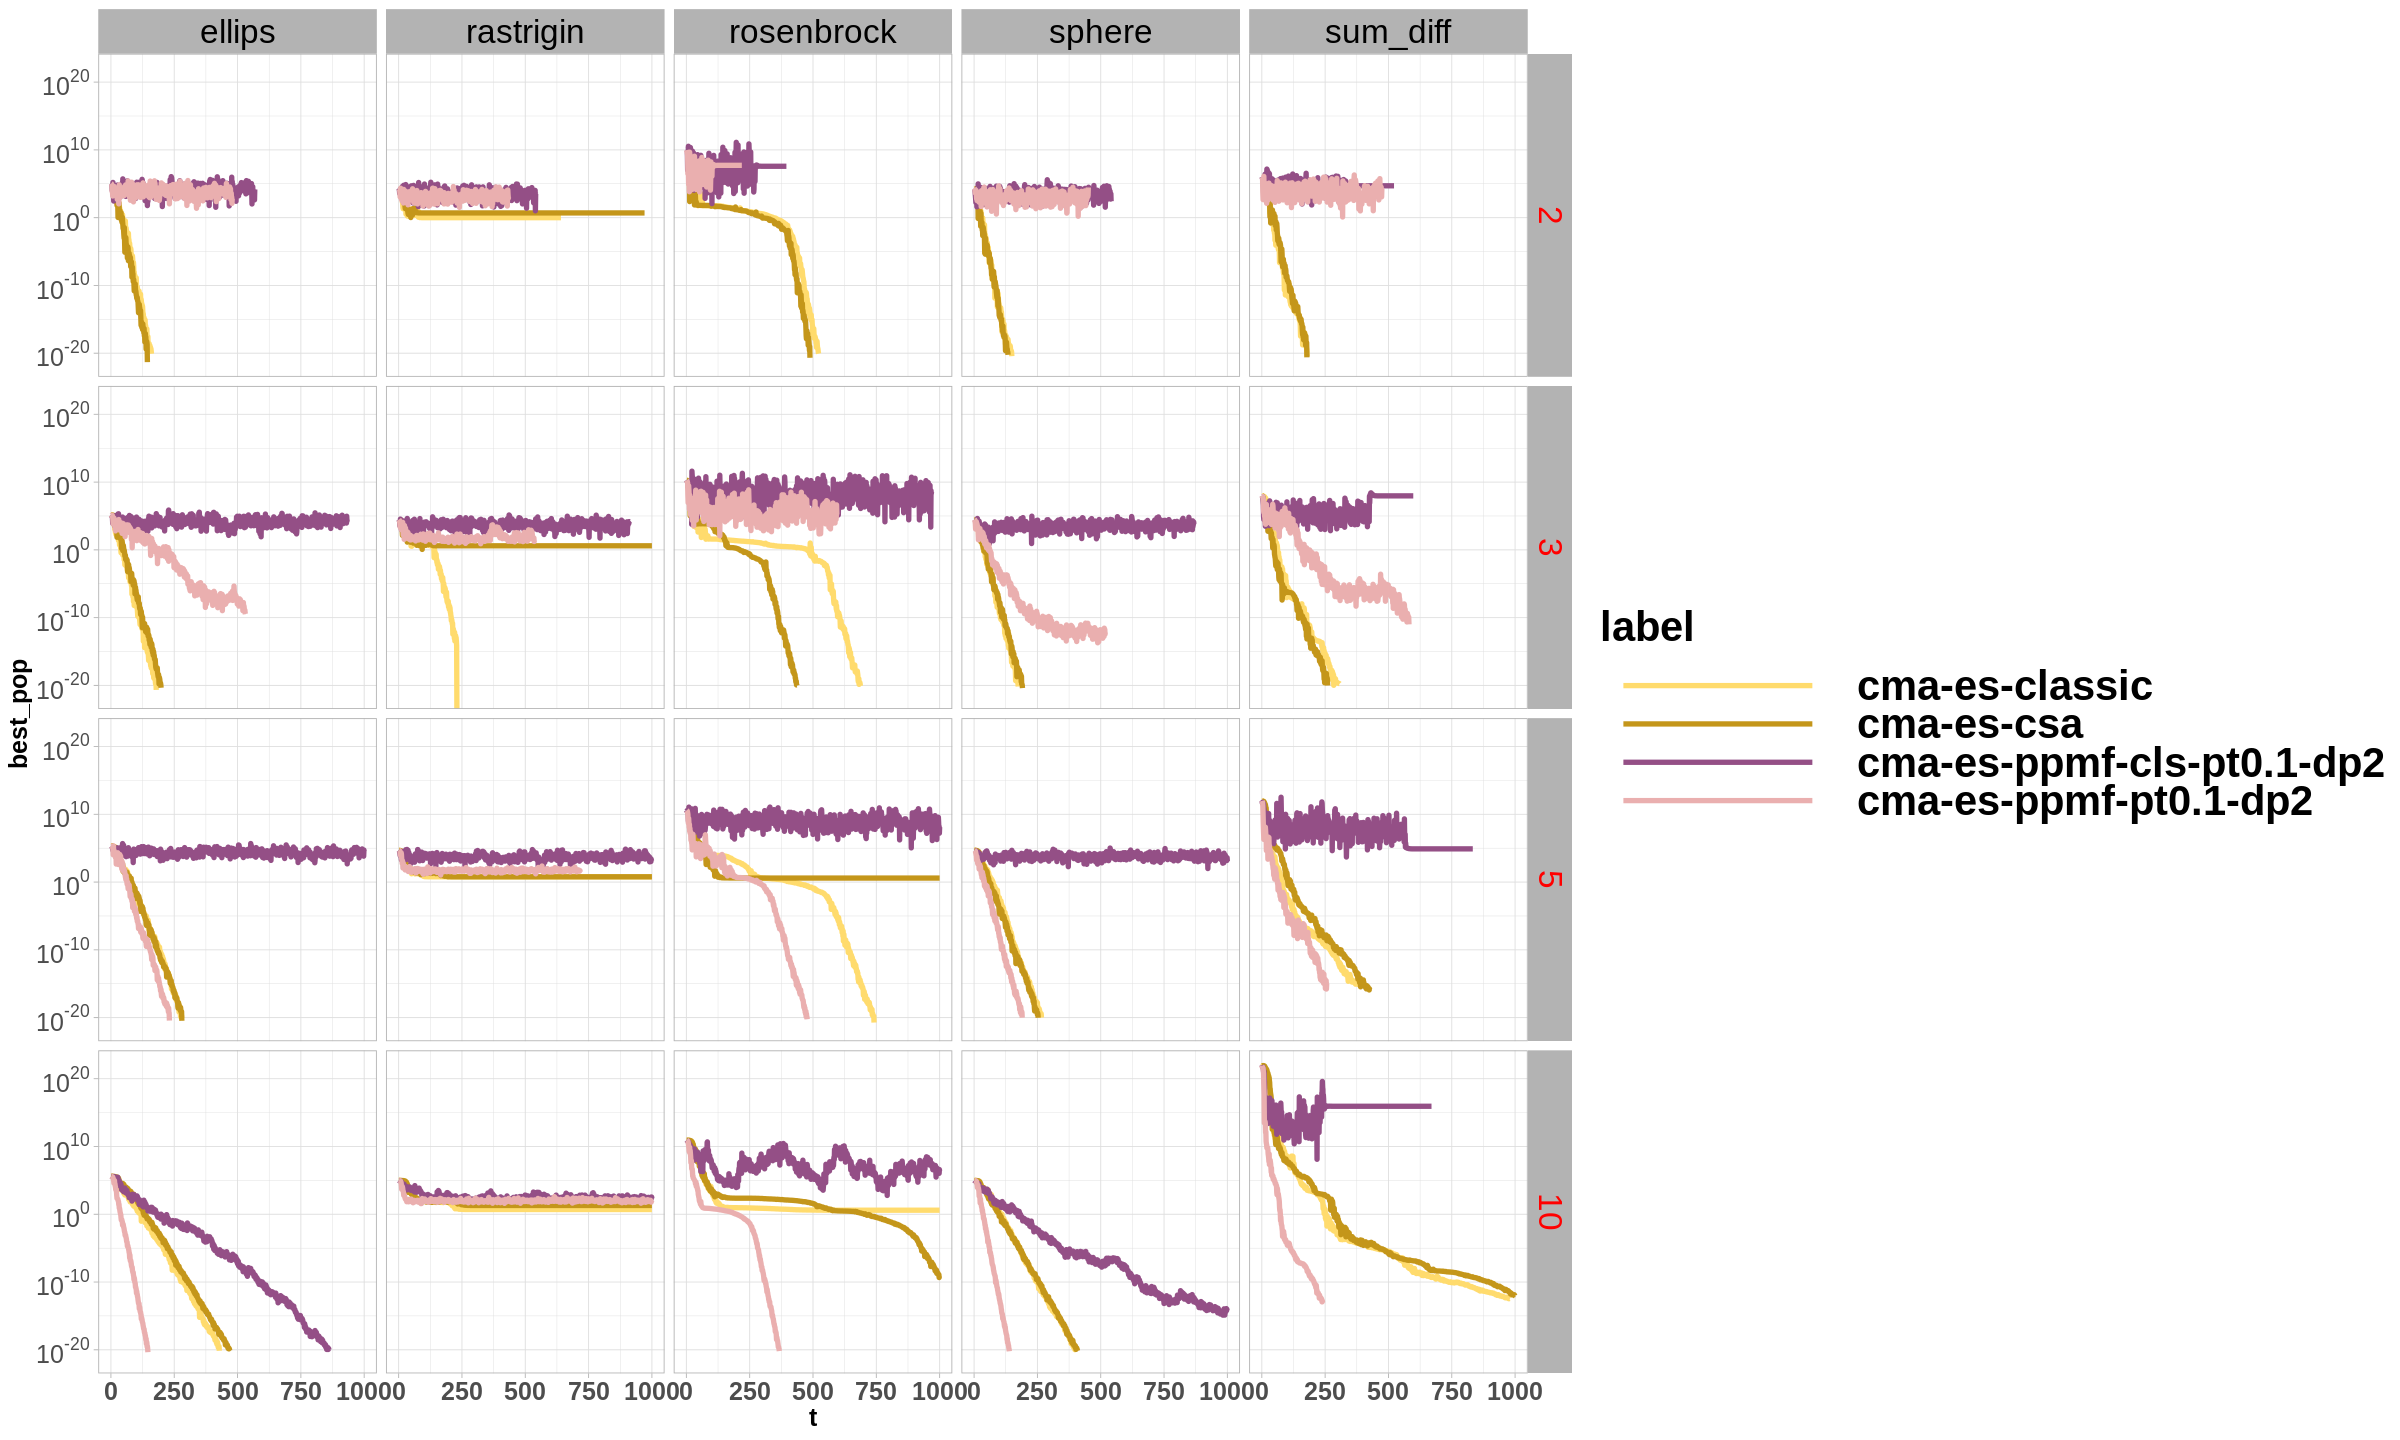

In [153]:
options(repr.plot.width=20, repr.plot.height=12)
all_data %>% dplyr::filter(Func != "linear") %>%
    vg_plot("best_pop", scale_y_log = TRUE) + facet_grid(rows = dplyr::vars(Dim), cols = dplyr::vars(Func)) + xlim(0, 1000)

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 20 row(s) containing missing values (geom_path).”


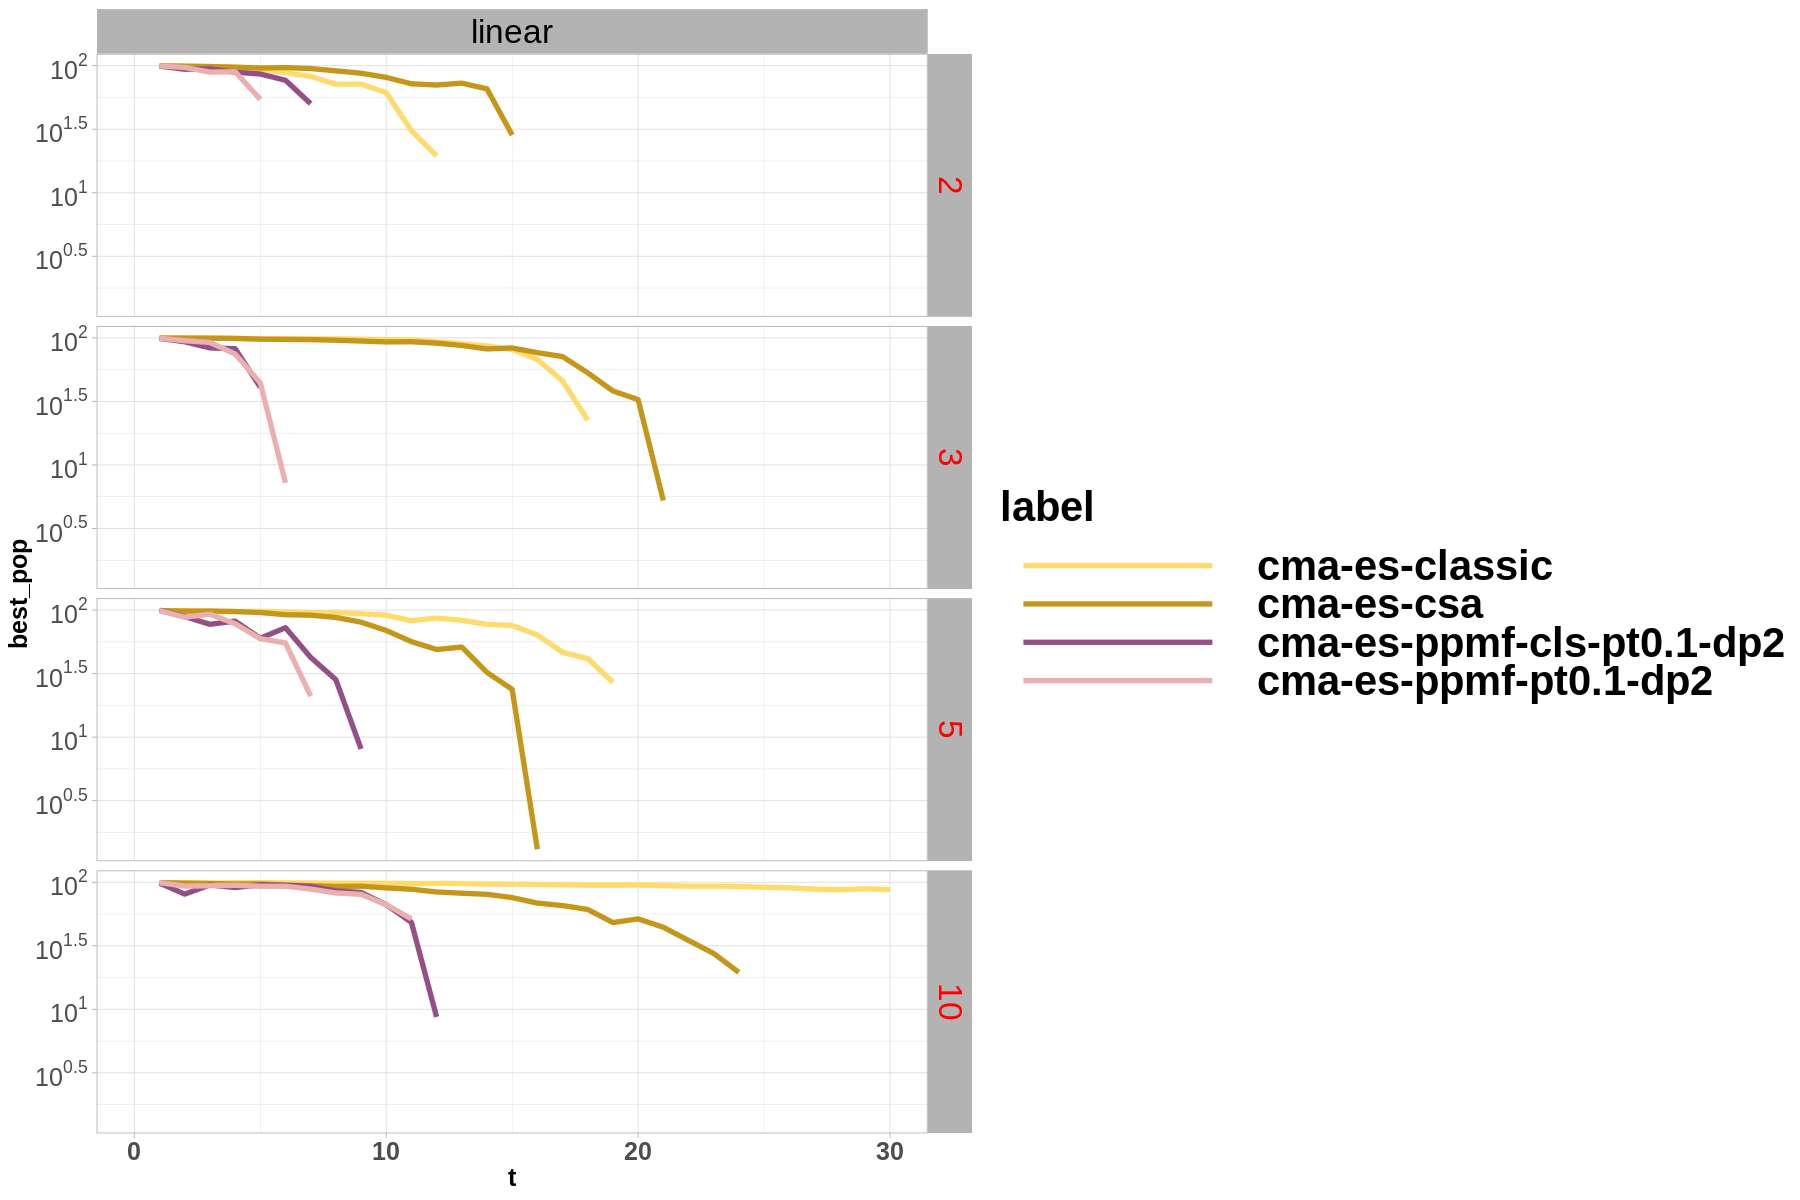

In [152]:
options(repr.plot.width=15, repr.plot.height=10)
all_data %>% dplyr::filter(Func == "linear") %>%
    vg_plot("best_pop", scale_y_log = TRUE) + facet_grid(rows = dplyr::vars(Dim), cols = dplyr::vars(Func)) + xlim(0, 30)